In [1]:
#SVM para la detección de diabetes
#En este ejercicio intentamos crear una SVM que permita identificar pacientes con diabetes 
#conociendo únicamente sus características físicas, 
#sin necesidad de realizar un examen específico sobre el tema. 
#Contamos con datos de 768 pacaientes, 
#los cuales están identificados on 0 en caso de no tener diabetes y 
#con 1 en caso de tener un diagnóstico positivo.


#usaremos Una maquina Vectorial (SVM) util cuando se tiene una gran cantidad de parametros y 
#se necesita clasificar si es 0 o 1 
#SVM para la detección de diabetes

#manipulacion de datos
import pandas as pd

#operaciones numericas
import numpy as np

#para medicion del tiempo que toma ejecutar los procesos 
from time import time

#para separar datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

#libreria para Maquina Vectorial SVM
from sklearn.svm import SVC

#Medicion de precision --Eficiencia del algoritmo 
from sklearn.metrics import accuracy_score, confusion_matrix

#creacion de graficos y visualizaciones
import matplotlib.pyplot as plt


In [2]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
datos_diabetes_df = pd.read_csv('datos_diabetes.csv')
# Mostrar información sobre el set de datos
datos_diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Embarazos               768 non-null    int64  
 1   Glucosa                 768 non-null    int64  
 2   PresionArterial         768 non-null    int64  
 3   GrosorDePiel            768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   FuncionPedigriDiabetes  768 non-null    float64
 7   Edad                    768 non-null    int64  
 8   Resultado               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
datos_diabetes_df

,Embarazos,Glucosa,PresionArterial,GrosorDePiel,Insulina,IMC,FuncionPedigriDiabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Realizada con una SVM de clasificación, que será relizada con la clas SVC de la librería sklearn.
#Nuestro objetivo será predecir la columna "Resultados", que contiene el resultado del diagnóstico. 
#Es importante comprender de qué manera se distribuyen las muestras para identificar 
#posibles fallas y tendencias falsas (sesgos) en nuestro algoritmo.

# Contar los valores únicos de una columna en un DataFrame
datos_diabetes_df['Resultado'].value_counts()
#datos_diabetes_df['Edad']#.value_counts()

0    500
1    268
Name: Resultado, dtype: int64

In [5]:
#En este caso, tenemos muchas más muestras de pacientes diagnosticados sin diabetes (0). 
#Esto podría representar un problema para las predicciones de nuestra SVM, 
#pues estará sesgada a predecir más resultados de la clase que contiene más muestras.


#Para empezar el proceso de entrenamiento, es necesario 
#separar las características (X) de las etiquetas (Y). 
#El objetivo de todo el análisis es poder predecir una etiqueta (Y), 
#contando únicamente con las características (Y). 
#La SVM se encargará de aprender la relación que existe entre X y Y.

## Crearemos un nuevo df llamado "X" con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar

lista_columnas_signos = [
    'Embarazos', 
    'Glucosa', 
    'PresionArterial', 
    'GrosorDePiel', 
    'Insulina',
    'IMC', 
    'FuncionPedigriDiabetes', 
    'Edad'
]

# Luego tomando esa lista del df original y lo separamos 
X = datos_diabetes_df[lista_columnas_signos]
# Mostraremos los primeros cinco registros para conocer cómo se compone X
X.head(5)



,Embarazos,Glucosa,PresionArterial,GrosorDePiel,Insulina,IMC,FuncionPedigriDiabetes,Edad
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
#Utilizaremos el mismo procedimiento para generar "Y" que es donde estaran los resultados

lista_columna_resultado = ['Resultado']
Y = datos_diabetes_df[lista_columna_resultado]
Y.head(5)

,Resultado
0,1
1,0
2,1
3,0
4,1


In [7]:
#nuestros objetos de X y Y, procederemos a separarlos en 
#"X" conjuntos de entrenamiento (Datos que serviran para aprender) y 
# "Y" prueba (para validadr que el aprendizaje sea correcto).

#Este proceso será realizado con la función train_test_split 
#que importamos al inicio del documento. Por defecto, esta función tomará 25% (0.25) 
#de nuestro conjunto total de datos como prueba y el resto para entrenamiento.

# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y
)

In [8]:
# veamos la cantidad de datos a utilizar para el entrenamiento "X"
#en este caso el numero de datos corresponde al 75% de la informacion 
# vemos 576 datos y 8 datos(columnas)
X_train.shape

(576, 8)

In [9]:
# veamos la cantidad de datos a utilizar para el entrenamiento "Y"
#en este caso el numero de datos corresponde al 75% de la informacion 
# vemos 576 datos y 1 dato (columna)
Y_train.shape

(576, 1)

In [10]:
# Luego, la cantidad de datos a utilizar para validar
# que corresponde al 25% de la informacion
X_test.shape

(192, 8)

In [11]:
# Luego, la cantidad de datos a utilizar para validar
# que corresponde al 25% de la informacion
Y_test.shape

(192, 1)

In [12]:
#Creación de la SVM
#Utilizaremos la clase SVC (Support Vector Classifier) que importamos al inicio. 
#Existen diversos tipos de kernel que podemos utilizar para crear una SVM. 
#En este caso tomaremos un kernel lineal (en sklearn linear)
#para que el entrenamiento sea rápido.

# Definició del modelo que llamaremos clf
clf = SVC(kernel='linear')

In [13]:
#El entrenamiento de un modelo en sklearn es bastante sencillo. 
#Basta con llamar el método fit para encontrar las relaciones entre nuestra X y Y. 
#El único inconveniente es que el método fit recibe valores de tipo array, 
#pero nuestros datos actualmente se encuentran contenidos en objetos de tipo pandas.DataFrame (df). 
#Para convertir un df en un array, basta con tomar el atributo values del mismo df.


# Guardamos el registro del momento en el que empezamos el entrenamiento

hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y Y
#
# El .ravel() que final de Y es values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X

clf.fit(X_train.values, Y_train.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

#para saber si un resultado de entrenamiento es bueno o malo va a depender de ciertos criterios, 
#como la cantidad de clases que tengamos "0" o "1" tiene diabetes o no tiene diabetes 
#lo mimimo que deberiamos tener como aceptado es un 50% 

#si tubieramos 3 clases lo minimo que podriamos esperar es un 33.3%
#si tubieramos 4 clases lo minimo que podriamos esperar es un 25%
#si tubieramos 5 clases lo minimo que podriamos esperar es un 20%

#para tener un numero de % apropiado de predicion es dividiendo el 100% en la cantidad de las clases
#como lo muestra en el ejemplo

Entrenamiento terminado en 9.302412986755371 segundos


In [14]:
#Terminado el entrenamiento, es necesario medir su precisión. 
#Para ello, intentaremos predecir los datos de "Y" de Prueba utilizando datos "X" de prueba. 
#A estos datos les llamaremos Y_pred, pues contendrán nuestra predicción.

# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()

# Iniciamos la predicción con datos "X" de prueba
Y_pred = clf.predict(X_test)

# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

Predicción terminada en 0.061994075775146484 segundos


E:\Programas windows\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [20]:
# Evaluamos la precisión 
accuracy_score(Y_test, Y_pred)

0.7604166666666666

In [21]:
#en este caso, la precisión del modelo fue relativamente aceptable (0.76). Sin embargo, 
#debido a que los datos de aprendizaje fueron muy pocos (cerca de 500) y 
#que estaban muy sesgados hacia la clase más representada (la gente sin diabetes), 
#es posible que no funcione bien en muchos casos.

#Matriz de confusión
#Una matriz de confusión nos ayuda a tener una mejor idea del rendimiento de nuestro modelo. 
#Se encarga de comparar la cantidad de aciertos de cada clase de 
#nuestros datos de prueba (Y_test en este caso) y nuestros datos calculados (Y_pred en este caso).

# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_diabetes = confusion_matrix(Y_test, Y_pred)
conf_diabetes

array([[115,  17],
       [ 29,  31]], dtype=int64)

In [22]:
#Debido a que es poco complicado comprender la matriz únicamente de forma numérica, 
#vamos a crear una función que lo muestre de forma gráfica.

def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

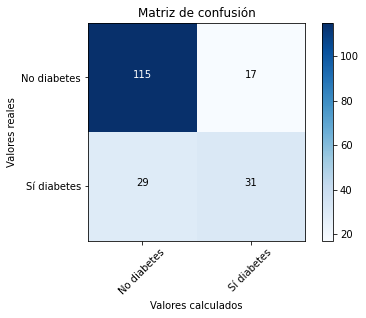

In [23]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_diabetes)
# classes = las clases a predecir (si tienen diabetes o no)
plot_cm(conf_diabetes, ['No diabetes', 'Sí diabetes'])